**Королев Егор Владимирович  
М8О-401Б-18  
Лабораторная работа #1  
Вариант №1**

# Постановка задачи

Используя явную и неявную конечно-разностные схемы, а также схему Кранка - Николсона, решить начально-краевую задачу для дифференциального уравнения параболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau,~h$.

Исходное уравнение с начально-краевыми условиями:

$$
\left\{
\begin{aligned}
& \dfrac{\partial u}{\partial t} = a \dfrac{\partial^2 u}{\partial x^2},~a>0\\
& u(0,t) = 0\\
& u(1,t) = 0\\
& u(x,0) = \sin(2 \pi x)\\
\end{aligned}
\right.
$$

Аналитическое решение системы:

$$u(x,t) = e^{-4\pi^2 a t} \sin(2 \pi x)$$

# Решение

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Функции, задающие начально-краевые условия и аналитическое решение:

In [2]:
def boundary_condition_1(t):
    return 0

def boundary_condition_2(t):
    return 0

def initial_condition(x):
    return math.sin(2 * math.pi * x)

def analytical_solution(x, t, a = 1.0):
    return math.exp(-4 * math.pi * math.pi * a * t) * math.sin(2 * math.pi * x)

Построим конечно-разностную схему по $t\in[0,T]$ и $x\in[0,l]$ с шагами $\tau,~h$, соответственно. Тогда количество шагов определяются следующими соотношениями: $h = l / N,~~ \tau = T / K$.

Пусть $u_i^k = u(x_i,t_k)$

## Явная конечно-разностная схема

Аппроскимируем производные:

$$
\begin{aligned}
& u_t(x_j,t_k) = \dfrac{u_j^{k+1} - u_j^k}{\tau}\\
& u_{xx}(x_j,t_k) = \dfrac{u_{j-1}^{k} - 2u_j^k + u_{j+1}^{k}}{h^2}\\
\end{aligned}
$$

Подставим полученные выражения в исходное уравнение:

$$\dfrac{u_j^{k+1} - u_j^k}{\tau} = a \dfrac{u_{j-1}^{k} - 2u_j^k + u_{j+1}^{k}}{h^2}$$

Обозначим $\sigma = \dfrac{a\tau}{h^2}$ и выразим из предыдущего уравнения $u_j^{k+1}$:

$$u_j^{k+1} = \sigma u_{j-1}^{k} + (1-2\sigma)u_j^k + \sigma u_{j+1}^{k}$$

## Неявная конечно-разностная схема

Апроксимируем вторую производную (3) по значениям верхнего временного слоя времени $t_{k+1}$:

$$u_{xx}(x_j,t_k) = \dfrac{u_{j-1}^{k+1} - 2u_j^{k+1} + u_{j+1}^{k+1}}{h^2}$$

Первую производную (3) оставим той же; подставим полученные выражения в исходное уравнение:

$$\dfrac{u_j^{k+1} - u_j^k}{\tau} = a \dfrac{u_{j-1}^{k+1} - 2u_j^{k+1} + u_{j+1}^{k+1}}{h^2}$$

Решить данную систему можно с помощью метода прогонки. Приведем уравнение (7) к каноническому виду уравнения прогонки:

$$a_j \cdot u_{j-1}^{k+1} + b_j \cdot u_{j}^{k+1} + c_j \cdot u_{j+1}^{k+1} = d_j,~~j=\overline{1,N-1}$$

Где $a_j = -\sigma,~~b_j = 1+2\sigma,~~c_j = -\sigma,~~d_j = u_{j}^{k}$

Первое и последние уравнения определяются с помощью граничных условий исходной сиситемы

## Конечно-разностная схема Кранка-Николсона

В данной КР схеме в качетсве аппроскимации второй производной берется линейная комбинация явной и неявной схем:

$$u_{xx}(x_j,t_k) = \theta a \dfrac{u_{j-1}^{k} - 2u_j^k + u_{j+1}^{k}}{h^2} + (1 - \theta) a \dfrac{u_{j-1}^{k+1} - 2u_j^{k+1} + u_{j+1}^{k+1}}{h^2}$$

При $\theta = 1/2$ схему называют КР схемой Кранка-Николсона

Полученную систему можно также решить методом прогонки. Первое и последнее уравнение определяются граничными условиями.

## Программная реализация явной конечно-разностной схемы

In [3]:
# генератор последовательностей с дробным шагом
def nparange(start, end, step = 1):
    cur = start
    e = 1e-10
    while cur - e <= end:
        yield cur
        cur += step

In [4]:
def explicit_finite_difference_scheme(l_start = 0.0, l_finish = 1.0, N = 30, t_start = 0.0, t_finish = 1.0, K = 300, a = 1.0, theta = 0.0):
    N = N - 1
    K = K - 1
    h = (l_finish - l_start) / N
    tau = (t_finish - t_start) / K
    sigma = a * a * tau / (h * h)
    if sigma > 0.5:
        print("sigma > 0.5")
    X = []
    Y = []
    ans = []
    
    x = list(nparange(l_start, l_finish, h))
    last_line = list(map(initial_condition, x))
    ans.append(list(last_line))
    X.append(x)
    Y.append([0.0 for _ in x])
    
    for t in nparange(t_start + tau, t_finish, tau):
        ans_line = [None for _ in last_line]
        for i in range(1, len(x) - 1):
            ans_line[i] = sigma * last_line[i - 1]
            ans_line[i] += (1 - 2 * sigma) * last_line[i]
            ans_line[i] += sigma * last_line[i + 1]
        ans_line[0] = boundary_condition_1(t)
        ans_line[-1] = boundary_condition_2(t)
        
        ans.append(ans_line)
        X.append(x)
        Y.append([t for _ in x])
        last_line = ans[-1]
    
    return X, Y, ans

## Программная реализация неявной конечно-разностной схемы и Кранка-Николсона

### Вспомогательный метод прогонки

In [5]:
def race_method(A, b):
    P = [-item[2] for item in A]
    Q = [item for item in b]

    eps = 0.0
    if A[0][1] == 0: # регуляризация
        eps = 1e-10
    P[0] /= (A[0][1] + eps)
    Q[0] /= (A[0][1] + eps)

    for i in range(1, len(b)):
        z = (A[i][1] + A[i][0] * P[i-1])
        P[i] /= (z + eps)
        Q[i] -= A[i][0] * Q[i-1]
        Q[i] /= (z + eps)

    x = [item for item in Q]

    for i in range(len(x) - 2, -1, -1):
        x[i] += P[i] * x[i + 1]

    return x

### Параметрический вид по параметру theta конечно-разностной схемы:

In [6]:
def unexplicit_finite_difference_scheme(l_start = 0.0, l_finish = 1.0, N = 30, t_start = 0.0, t_finish = 1.0, K = 300, a = 1.0, theta = 0.5):
    N = N - 1
    K = K - 1
    h = (l_finish - l_start) / N
    tau = (t_finish - t_start) / K
    sigma = a * a * tau / (h * h)
    X = []
    Y = []
    ans = []
    
    x = list(nparange(l_start, l_finish, h))
    last_line = list(map(initial_condition, x))
    ans.append(list(last_line))
    X.append(x)
    Y.append([0.0 for _ in x])
    
    for t in nparange(t_start + tau, t_finish, tau):
        coeff_a = sigma * theta
        coeff_b = -1 - 2 * sigma * theta
        
        A = [
            (coeff_a, coeff_b, coeff_a)
            for _ in range(1, len(x)-1)
        ]
        coeff_d = [
            -(last_line[i] + (1 - theta) * sigma* (last_line[i-1] - 2*last_line[i] + last_line[i+1])) 
            for i in range(1, len(x)-1)
        ]
        A.insert(0, (0,0,boundary_condition_1(0)))
        coeff_d.insert(0, boundary_condition_1(0))
        
        A.append((0,0,boundary_condition_2(0)))
        coeff_d.append(boundary_condition_2(0))
        
        ans.append(race_method(A, coeff_d))
        X.append(x)
        Y.append([t for _ in x])
        last_line = ans[-1]
    
    return X, Y, ans

# Вычисление погрешностей методов

Вычисление ошибки (норма матрицы ошибки):

In [7]:
def matrix_error(x, y, z, f):
    ans = 0.0
    for i in range(len(z)):
        for j in range(len(z[i])):
            ans += (z[i][j] - f(x[i][j], y[i][j]))**2
    return ans**0.5

In [8]:
def error_plot(solver, real_f, theta = 0.5):
    a = 1.0
    h = []
    e = []
    for N in range(5, 30):
        # используется зависимость K = 100*N*N для выполнения условия стабилизации a*a*tau / (h*h) < 0.5
        x, t, ans = solver(N=N, K = 100*N*N, theta=theta, a=a)
        #print(matrix_error(x, t, ans, analytical_solution))
        h.append(1.0 / N)
        e.append(matrix_error(x, t, ans, real_f))
    return h, e

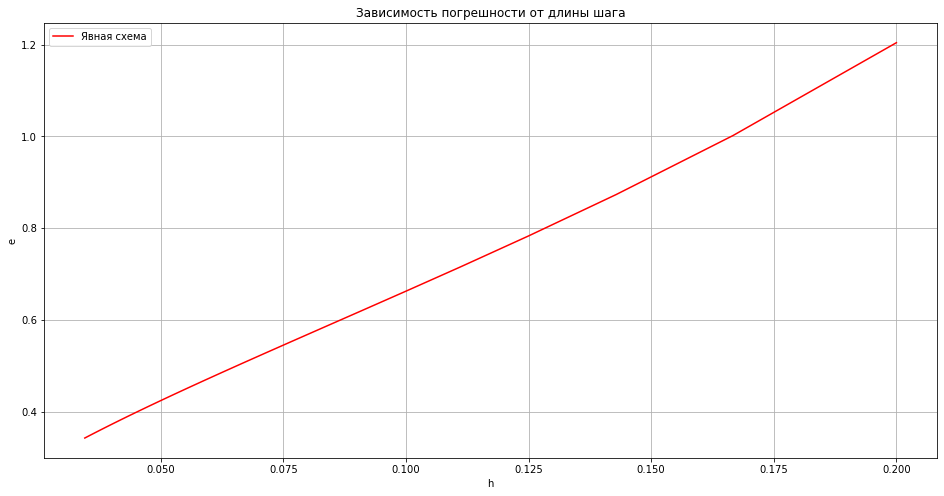

In [9]:
plt.figure(figsize = (16, 8))

plt.title("Зависимость погрешности от длины шага")
h, e = error_plot(explicit_finite_difference_scheme, analytical_solution, 0.0)

plt.plot(h, e, label="Явная схема", color = "red")
plt.xlabel("h")
plt.ylabel("e")
plt.legend()
plt.grid()

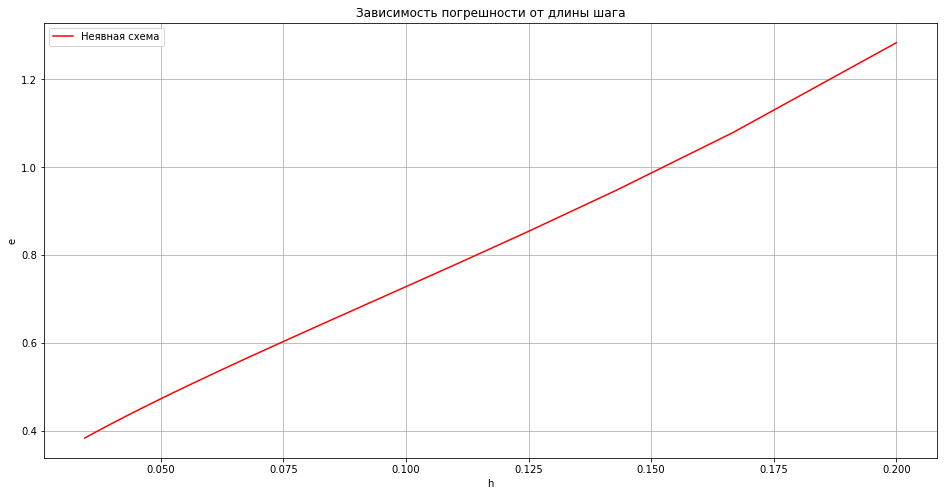

In [10]:
plt.figure(figsize = (16, 8))

plt.title("Зависимость погрешности от длины шага")
h, e = error_plot(unexplicit_finite_difference_scheme, analytical_solution, 1.0)

plt.plot(h, e, label="Неявная схема", color = "red")
plt.xlabel("h")
plt.ylabel("e")
plt.legend()
plt.grid()

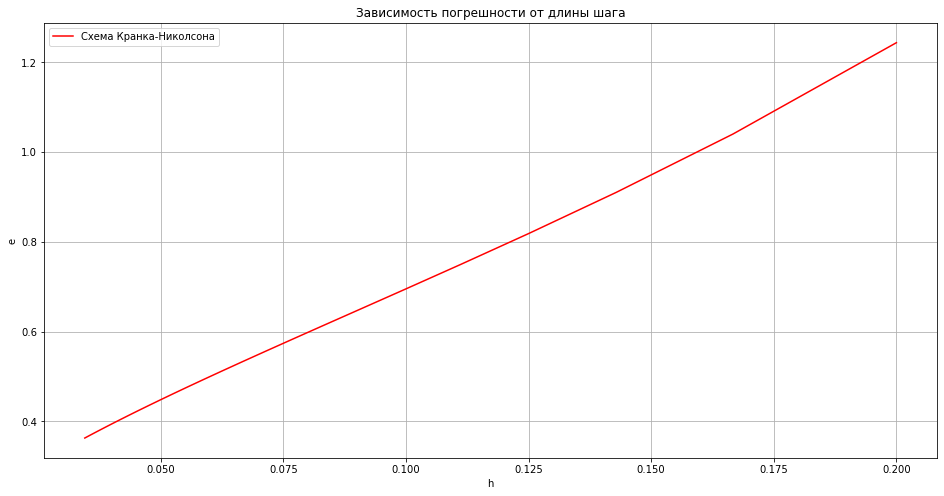

In [11]:
plt.figure(figsize = (16, 8))

plt.title("Зависимость погрешности от длины шага")
h, e = error_plot(unexplicit_finite_difference_scheme, analytical_solution, 0.5)

plt.plot(h, e, label="Схема Кранка-Николсона", color = "red")
plt.xlabel("h")
plt.ylabel("e")
plt.legend()
plt.grid()

0.14766209414478312

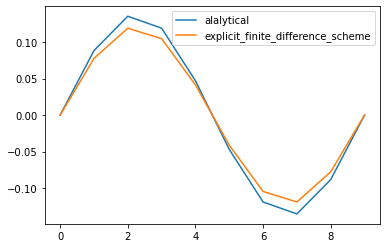

In [12]:
X_e, Y_e, Z_e = explicit_finite_difference_scheme(N = 10, K = 200)
z_plot = []
r = 10
for i in range(0, len(X_e[r]), 1):
    z_plot.append(analytical_solution(X_e[r][i], Y_e[r][i]))
plt.plot(z_plot, label="alalytical")
plt.plot(Z_e[r], label="explicit_finite_difference_scheme")
plt.legend()

matrix_error(X_e, Y_e, Z_e, analytical_solution)

0.3176886779753817

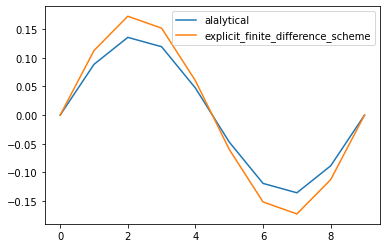

In [13]:
X_e, Y_e, Z_e = unexplicit_finite_difference_scheme(N = 10, K = 200, theta=1.0)
z_plot = []
r = 10
#print(len(Y_e))
for i in range(0, len(X_e[r]), 1):
    z_plot.append(analytical_solution(X_e[r][i], Y_e[r][i]))
plt.plot(z_plot, label="alalytical")
plt.plot(Z_e[r], label="explicit_finite_difference_scheme")
plt.legend()

matrix_error(X_e, Y_e, Z_e, analytical_solution)

0.09073443757994391

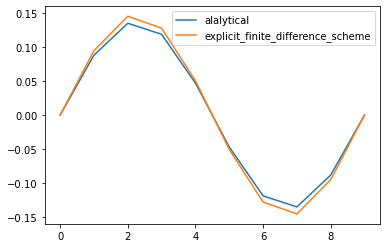

In [14]:
X_e, Y_e, Z_e = unexplicit_finite_difference_scheme(N = 10, K = 200, theta=0.5)
z_plot = []
r = 10
#print(len(Y_e))
for i in range(0, len(X_e[r]), 1):
    z_plot.append(analytical_solution(X_e[r][i], Y_e[r][i]))
plt.plot(z_plot, label="alalytical")
plt.plot(Z_e[r], label="explicit_finite_difference_scheme")
plt.legend()

matrix_error(X_e, Y_e, Z_e, analytical_solution)